加速度・ジャイロ・磁気・高度センサから動きを複合推定する

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from coremotion.cm_motion_manager import *
import time

# センサなどを扱うMotionManagerクラスのインスタンスを作る
my_motion_manager = MotionManager()
time.sleep(1)
# 計測時間間隔を設定する（単位：秒）
interval  = 0.5

# 10秒間計測を行う
data = []
my_motion_manager.start_device_motion_updates()
time.sleep(1) # 準備が整うまで少し待つ
for i in range(int(10/interval)):
    data.append(my_motion_manager.get_device_motion())
    time.sleep(interval)
# 計測終了
my_motion_manager.stop_device_motion_updates()

In [3]:
print(data[0])

{'attitude': <rubicon.objc.api.ObjCInstance 0x130764cd0: CMAttitude at 0x2828b8ef0: CMAttitude Pitch: 23.987626, Roll: -0.486218, Yaw: 0.098898
>, 'rotationRate': <classes.header.CMRotationRate object at 0x130768350>, 'gravity': <classes.header.CMAcceleration object at 0x130768650>, 'userAcceleration': <classes.header.CMAcceleration object at 0x1307686d0>, 'magneticField': <classes.header.CMMagneticField object at 0x1307687d0>, 'heading': -1.0, 'sensorLocation': 0}


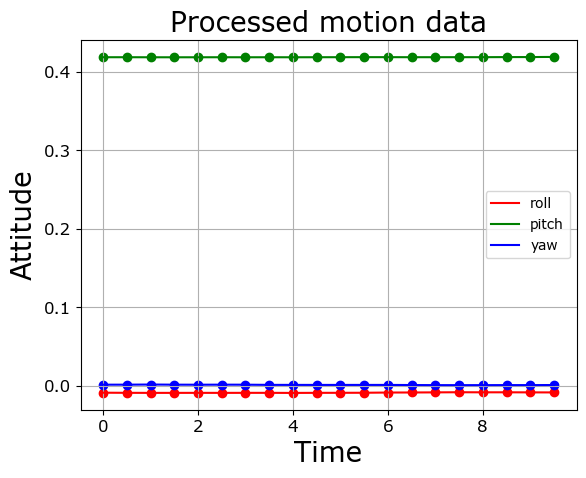

<Figure size 800x400 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

roll  = [ d['attitude'].roll for d in data]
pitch = [ d['attitude'].pitch for d in data]
yaw  = [ d['attitude'].yaw for d in data]

# 横軸の時間リストを作成する
t = np.arange(0., 
              len(roll)*interval,
              interval)

plt.scatter(t, roll, c="r")
plt.plot(t, roll, label='roll', c="r")

plt.scatter(t, pitch, c="g")
plt.plot(t, pitch,label='pitch', c="g")

plt.scatter(t, yaw, c="b")
plt.plot(t, yaw, label='yaw', c="b")

plt.title("Processed motion data", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Attitude', fontsize=20)

plt.tick_params(labelsize=12)
plt.grid()
plt.legend()
plt.figure(figsize=[8,4])
plt.show()